# งานเพื่อวัดผลการเรียนรู้ของผู้เข้าอบรม (60 คะแนน)
Cat and Dog

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [3]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลของสุนัข และแมวตามคุณลักษณะ (Features) ประกอบด้วย
# หน้ากลม (face), หูตั้ง (ear), สีน้ำตาล (brown), แลบลิ้น (tongue), หนวดยาว (whisker)
data = pd.DataFrame({
    'face':[0, 0, 0, 1, 1, 0],                # หน้ากลม
    'ear':[1, 0, 0, 1, 1, 1],                 # หูตั้ง
    'brown':[1, 1, 1, 0, 1, 0],               # สีน้ำตาล
    'tongue':[1, 1, 0, 0, 0, 0],              # แลบลิ้น
    'whisker':[1, 0, 0, 1, 1, 1],             # หนวดยาว
    'target':['dog', 'dog', 'dog', 'cat', 'cat', 'cat'] # ค่าเป้าหมาย (target) หรือ คลาส (class) หรือ ฉลาก (label)
})

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,dog
1,0,0,1,1,0,dog
2,0,0,1,0,0,dog
3,1,1,0,0,1,cat
4,1,1,1,0,1,cat
5,0,1,0,0,1,cat


## แปลงรหัส (Encoding) ค่าเป้าหมาย (target) จากตัวอักษร 'cat' และ 'dog' ให้กลายเป็นตัวเลขแบบ Label (5 คะแนน)

In [9]:
# Label Encoding ค่าเป้าหมาย (target) แล้วเก็บไว้ใน คอลัมน์ data['target']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['target'] = label_encoder.fit_transform(data['target'])

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,1
1,0,0,1,1,0,1
2,0,0,1,0,0,1
3,1,1,0,0,1,0
4,1,1,1,0,1,0
5,0,1,0,0,1,0


## แปลงข้อมูลคุณลักษณะ (Features) ที่จัดเก็บใน DataFrame ให้อยู่ในรูป numpy.array 2 มิติ / และ numpy.array ของค่าเป้าหมาย ('target') (25 คะแนน)

In [11]:
# จัดทำ numpy.array สำหรับจัดเก็บคุณลักษณะ (Features) ที่เราจะใช้ในการตัดสินใจ และ ค่าเป้าหมาย (target) (25 คะแนน)

import numpy as np

feature_names = ['face', 'ear', 'brown', 'tongue', 'whisker']
target_name = 'target'

features = np.array(data[feature_names])
target = np.array(data[target_name])

In [12]:
features

array([[0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1]])

In [13]:
target

array([1, 1, 1, 0, 0, 0])

## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก แมว กับสุนัข (20 คะแนน)

In [15]:
# นำเข้า Library ของต้นไม้ที่ใช้ในการตัดสินใจ
# สร้างแบบจำลองของต้นไม้ที่ใช้ในการตัดสินใจ (5 คะแนน)
# ส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไป Train (10 คะแนน)
# ทดสอบความถูกต้องของแบบจำลอง โดยส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไปทดสอบ (5 คะแนน)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features, target)
model.score(features, target)


1.0

### แสดงต้นไม้ตัดสินใจ (Decision Tree) (10 คะแนน)

[Text(0.6, 0.8333333333333334, 'tongue <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = cat'),
 Text(0.4, 0.5, 'whisker <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = cat'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = dog'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = cat'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = dog'),
 Text(0.7, 0.6666666666666667, '  False')]

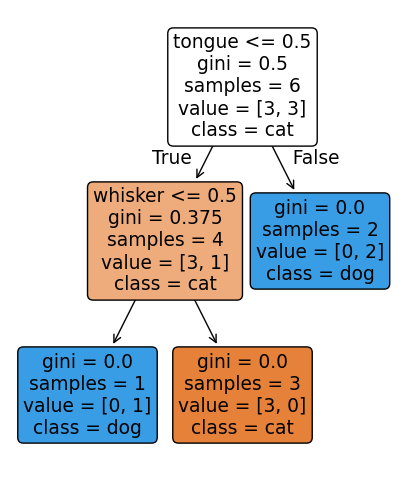

In [26]:
# นำเข้า Library สำหรับวาดต้นไม้
# ส่งโมเดลให้กับ Library สำหรับวาดต้นไม้ (plot_tree) (5 คะแนน)
# ปรับแต่งกราฟที่ได้ให้สวยงาม

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(5,6))

tree.plot_tree(model, filled=True, feature_names=['face','ear','brown','tongue','whisker'], class_names=['cat','dog'], rounded=True)

In [24]:
# วาดต้นไม้ในลักษณะที่แสดงเป็นข้อความ (export_text) ที่คนทั่วไปสามารถเข้าใจได้ (5 คะแนน)
tree_result = tree.export_text(model, feature_names=['face','ear','brown','tongue','whisker'])

print(tree_result)

|--- tongue <= 0.50
|   |--- whisker <= 0.50
|   |   |--- class: 1
|   |--- whisker >  0.50
|   |   |--- class: 0
|--- tongue >  0.50
|   |--- class: 1

